#**Análisis del Poder Disciplinario en 'Vigilar y Castigar' mediante Técnicas de Procesamiento de Lenguaje Natural**#

**Abstract**: Este trabajo tiene como objetivo analizar los mecanismos del poder disciplinario descritos por Michel Foucault en su obra "Vigilar y Castigar", utilizando técnicas de Procesamiento de Lenguaje Natural (NLP). La metodología se centra en el preprocesamiento del texto, que incluye tokenización, lematización y la eliminación de palabras vacías para obtener una representación adecuada del contenido. Posteriormente, se emplean técnicas de análisis de frecuencia de términos, generación de n-gramas (bigramas y trigramas), análisis de TF-IDF y modelado de temas mediante Latent Dirichlet Allocation (LDA) para identificar patrones recurrentes y temas principales en el discurso de Foucault sobre vigilancia y castigo. El objetivo es ofrecer una comprensión cuantitativa y profunda del texto que permita interpretar cómo se construyen y se repiten los conceptos fundamentales de poder y disciplina.

**Carga de bibliotecas y configuración inicial**

En esta sección, procederemos a cargar las bibliotecas necesarias para nuestro análisis, así como el archivo EPUB sobre el cual trabajaremos. Una vez extraído el texto correspondiente, se realizará la conversión a HTML y se filtrarán las palabras en francés, que son frecuentes en este texto académico. Para llevar a cabo el análisis del texto, instalamos e importamos bibliotecas fundamentales de Procesamiento de Lenguaje Natural (NLP) como spaCy, TextBlob y NLTK, cada una desempeñando un papel crucial en el análisis de contenido y sentimiento. Esta configuración inicial permite preparar todas las herramientas necesarias para un análisis adecuado del discurso, asegurando un enfoque preciso al trabajar con el idioma español y la complejidad de los términos utilizados por Foucault.


In [3]:
import nltk

# Instalar bibliotecas necesarias
!pip install ebooklib beautifulsoup4 langid
# Descargar e instalar el modelo de spaCy para español
!python -m spacy download es_core_news_lg
!pip install pyLDAvis
from ebooklib import epub
from bs4 import BeautifulSoup
from google.colab import files
import langid
import re

# Cargar el archivo EPUB usando Google Colab
uploaded = files.upload()

# Leer el archivo EPUB cargado
epub_filename = list(uploaded.keys())[0]  # Obtener el nombre del archivo cargado
libro = epub.read_epub(epub_filename)

# Extraer el texto del libro
texto = ""
for item in libro.get_items():
    if isinstance(item, epub.EpubHtml):  # Comprobar si el elemento es de tipo EpubHtml
        soup = BeautifulSoup(item.get_content(), 'html.parser')
        texto += soup.get_text(separator=' ')  # Añadir separador para evitar concatenación sin espacios

# Verificar si el texto fue extraído
if texto.strip():
    print("Contenido del libro cargado:", texto[:500])  # Imprimir los primeros 500 caracteres del texto
else:
    print("No se pudo extraer el contenido del libro. Por favor, verifica el formato del archivo.")

# Filtrar las partes del texto que están en español
fragmentos = re.split(r'(?<=[.!?]) +', texto)  # Dividir el texto en oraciones
fragmentos_espanol = [fr for fr in fragmentos if langid.classify(fr)[0] == 'es']

# Concatenar los fragmentos en español
texto_espanol = ' '.join(fragmentos_espanol)

# Calcular el porcentaje de texto en español
cantidad_fragmentos_total = len(fragmentos)
cantidad_fragmentos_espanol = len(fragmentos_espanol)
cantidad_fragmentos_no_espanol = cantidad_fragmentos_total - cantidad_fragmentos_espanol
porcentaje_espanol = (cantidad_fragmentos_espanol / cantidad_fragmentos_total) * 100 if cantidad_fragmentos_total > 0 else 0

# Verificar si el texto en español fue extraído
if texto_espanol.strip():
    print("Contenido del libro filtrado en español:", texto_espanol[:500])  # Imprimir los primeros 500 caracteres del texto en español
    print(f"\nCantidad de fragmentos en español: {cantidad_fragmentos_espanol}")
    print(f"Cantidad de fragmentos no en español: {cantidad_fragmentos_no_espanol}")
    print(f"Porcentaje de texto en español: {porcentaje_espanol:.2f}%")
else:
    print("No se encontraron suficientes fragmentos en español en el texto proporcionado.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 1.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Saving Vigilar y Castigar - Michael Foucault.epub to Vigilar y Castigar - Michael Foucault.epub


/usr/local/lib/python3.10/dist-packages/ebooklib/epub.py:1423: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to './/xmlns:rootfile[@media-type]'
  for root_file in tree.findall('//xmlns:rootfile[@media-type]', namespaces={'xmlns': NAMESPACES['CONTAINERNS']}):


Contenido del libro cargado: 
 
 
 
 SUPLICIO 
 
 

 
 
 
 I. EL CUERPO DE LOS CONDENADOS 
 Damiens fue condenado, el 2 de marzo de 1757, a "pública retractación ante la puerta principal de la Iglesia de París", adonde debía ser "llevado y conducido en una carreta, desnudo, en camisa, con un hacha de cera encendida de dos libras de peso en la mano"; después, "en dicha carreta, a la plaza de Grève, y sobre un cadalso que allí habrá sido levantado [deberán serle] atenaceadas las tetillas, brazos, muslos y pantorrillas, y su m
Contenido del libro filtrado en español: EL CUERPO DE LOS CONDENADOS 
 Damiens fue condenado, el 2 de marzo de 1757, a "pública retractación ante la puerta principal de la Iglesia de París", adonde debía ser "llevado y conducido en una carreta, desnudo, en camisa, con un hacha de cera encendida de dos libras de peso en la mano"; después, "en dicha carreta, a la plaza de Grève, y sobre un cadalso que allí habrá sido levantado [deberán serle] atenaceadas las tetillas,

##**PREPROCESAMIENTO DE TEXTO - 1. Tokenización y remoción de stop-words**##

El próximo paso en el procesamiento del texto es la tokenización del contenido y la remoción de las stopwords. La tokenización consiste en dividir el texto en unidades más pequeñas llamadas "tokens", que usualmente son palabras individuales. Este proceso nos permite analizar el texto de una manera más granular, facilitando la aplicación de técnicas de procesamiento posteriores. A continuación, se lleva a cabo la eliminación de stopwords, que son palabras muy comunes como "el", "y", "a" que no aportan un significado específico para la mayoría de los análisis de texto.

En este caso, se utilizan tanto las stopwords predeterminadas en NLTK como las de spaCy, y se añade manualmente la palabra "él" para asegurar su eliminación, ya que es frecuente y no contribuye a los análisis. Además, se normaliza el texto eliminando los signos de puntuación y convirtiendo todas las palabras a minúsculas, lo cual contribuye a la consistencia del análisis.

La eliminación de stopwords nos permite enfocarnos en términos más significativos, mejorando la calidad del análisis y reduciendo el "ruido" en el texto. Esto es especialmente importante en el caso de 'Vigilar y Castigar', donde los conceptos clave vinculados al poder y la disciplina se destacan mejor sin la interferencia de palabras que no aportan al análisis. Al finalizar este paso, se realizan cálculos de métricas para verificar la reducción de palabras y asegurarnos de que se han eliminado correctamente las stopwords, incluyendo un chequeo específico de la palabra "él". Estas métricas también nos proporcionan una visión cuantitativa del impacto de la eliminación de stopwords en el texto.


In [4]:
# Tokenización y eliminación de stopwords con spaCy
import re
import nltk
import spacy

# Descargar las bibliotecas necesarias
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

# Cargar el modelo de spaCy para español
nlp = spacy.load('es_core_news_lg')

# Definir las stopwords en español, incluyendo las de spaCy y NLTK, y añadir 'él' manualmente
stop_words = set(stopwords.words('spanish')).union(nlp.Defaults.stop_words)
stop_words = {word.lower() for word in stop_words}  # Convertir todas las stopwords a minúsculas
stop_words.add('él')

# Normalizar el texto: eliminar signos de puntuación y convertir a minúsculas
texto_espanol_limpio = re.sub(r'\W+', ' ', texto_espanol).lower()

# Tokenizar el texto usando spaCy y filtrar las stopwords, fechas y nombres propios
doc = nlp(texto_espanol_limpio)
palabras_filtradas = [
    token.text for token in doc
    if token.text not in stop_words
    and not token.is_punct
    and not token.is_space
    and token.ent_type_ not in ['DATE', 'TIME', 'GPE', 'PERSON', 'ORG', 'NORP']
]

# Cálculos de métricas
cantidad_palabras_original = len(texto_espanol_limpio.split())
cantidad_palabras_filtradas = len(palabras_filtradas)
reduccion_palabras = cantidad_palabras_original - cantidad_palabras_filtradas
porcentaje_reduccion = (reduccion_palabras / cantidad_palabras_original) * 100 if cantidad_palabras_original > 0 else 0
porcentaje_remanente = 100 - porcentaje_reduccion

# Mostrar métricas de reducción
print("Cantidad de palabras antes de la eliminación de stopwords:", cantidad_palabras_original)
print("Cantidad de palabras después de la eliminación de stopwords:", cantidad_palabras_filtradas)
print("Reducción de palabras:", reduccion_palabras)
print(f"Porcentaje de reducción: {porcentaje_reduccion:.2f}%")
print(f"Porcentaje del texto remanente: {porcentaje_remanente:.2f}%")

# Verificar si 'él' ha sido eliminado
if 'él' not in palabras_filtradas:
    print("La palabra 'él' ha sido eliminada correctamente.")
else:
    print("La palabra 'él' no ha sido eliminada correctamente.")

print("Primeras 20 palabras sin stopwords:", palabras_filtradas[:20])


Cantidad de palabras antes de la eliminación de stopwords: 129255
Cantidad de palabras después de la eliminación de stopwords: 52927
Reducción de palabras: 76328
Porcentaje de reducción: 59.05%
Porcentaje del texto remanente: 40.95%
La palabra 'él' ha sido eliminada correctamente.
Primeras 20 palabras sin stopwords: ['cuerpo', 'condenados', 'damiens', 'condenado', '2', 'marzo', '1757', 'pública', 'retractación', 'puerta', 'principal', 'iglesia', 'parís', 'adonde', 'debía', 'llevado', 'conducido', 'carreta', 'desnudo', 'camisa']


Los resultados de la eliminación de stopwords nos ofrecen una perspectiva cuantitativa del proceso de limpieza y reducción de ruido en el texto:

1. **Reducción de Palabras**: Se observa que el número de palabras se redujo de 129,255 a 52,927, lo que representa una reducción significativa de 76,328 palabras. Esto equivale a un **59.05% de reducción del texto**. Esta limpieza resulta crucial para enfocar el análisis en términos de mayor relevancia y eliminar aquellos que no aportan información significativa.

2. **Porcentaje del Texto Remanente**: Tras la eliminación de las stopwords, **el 40.95% del texto original permanece**. Esto significa que poco menos de la mitad del contenido original se considera útil para análisis posteriores. Este porcentaje de texto remanente está compuesto por palabras que tienen una mayor relevancia en cuanto a contenido semántico y que contribuyen a destacar los conceptos clave del texto, como las nociones de poder y disciplina.

3. **Chequeo de la Palabra 'él'**: Se confirmó que la palabra "él" fue eliminada correctamente, lo cual demuestra la efectividad de la lista de stopwords personalizada que hemos definido.

4. **Primeras 20 Palabras Sin Stopwords**: Las primeras 20 palabras obtenidas tras la eliminación de stopwords incluyen términos como "cuerpo", "condenados", "iglesia", "pública", "conducido", entre otros. Estos términos sugieren un enfoque temático centrado en la justicia, la autoridad y la disciplina en la modelación de la conducta, temas fundamentales de la obra de Foucault.

La eliminación de stopwords nos permitió reducir considerablemente el volumen del texto, eliminando las palabras de poca relevancia y resaltando los términos fundamentales para el análisis de la obra. Estos pasos son esenciales para mejorar la calidad del análisis y centrar la atención en los elementos más significativos del discurso foucaultiano sobre el poder y la vigilancia.

## **PREPROCESAMIENTO DE TEXTO - 2. Lematización del Texto** ##

En esta etapa, se lleva a cabo la lematización del texto de "Vigilar y Castigar". La lematización es un proceso de normalización lingüística que permite reducir las palabras a su forma base o "lema". A diferencia del stemming, que simplemente elimina los sufijos de las palabras para obtener una raíz, la lematización tiene en cuenta el contexto gramatical y la estructura de la oración, lo cual resulta en una mayor precisión. Esta decisión de optar por la lematización en lugar del stemming fue clave, dado que "Vigilar y Castigar" trata temas complejos y específicos sobre el poder, la disciplina y el control, donde el análisis correcto de cada término es relevante.

El stemming, aunque eficiente, tiende a generar términos ambiguos y a veces incompletos, lo cual podría haber dificultado el análisis de conceptos fundamentales del texto. En cambio, la lematización nos permite mantener el contexto y analizar el discurso de manera más coherente. Por ejemplo, términos como "vigilancia", "vigilar" y "vigilado" se reducen al mismo lema, lo cual facilita la identificación de patrones consistentes en la narrativa de Foucault.

Además, durante este proceso, se eliminaron nuevamente las stopwords después de la lematización para garantizar que se filtraran todas las palabras irrelevantes, mejorando así la calidad del análisis. Las métricas resultantes permiten evaluar la efectividad de la lematización en términos de la cantidad de palabras antes y después del proceso, así como las palabras únicas que quedaron. Este paso es fundamental para asegurar que la información procesada sea lo más clara y precisa posible para los análisis posteriores, mejorando la cohesión y reduciendo la redundancia en los datos.

In [5]:
# Aplicación de Lematización
# Cargar el modelo de spaCy para español
import spacy
nlp = spacy.load('es_core_news_lg')

# Cargar el modelo de spaCy para español y aplicar lematización
doc = nlp(" ".join(palabras_filtradas))
lemas = [token.lemma_ for token in doc]

# Filtrar nuevamente las stopwords después de la lematización
lemas_filtrados = [lemma for lemma in lemas if lemma.lower() not in stop_words]

print("Primeras 20 palabras después de la lematización:", lemas_filtrados[:20])

# Métricas después de la lematización
print(f"Cantidad de palabras antes de la lematización: {len(palabras_filtradas)}")
print(f"Cantidad de palabras después de la lematización: {len(lemas)}")
print(f"Cantidad de palabras únicas después de la lematización: {len(set(lemas))}")
print(f"Cantidad de palabras después de la eliminación de stopwords tras lematización: {len(lemas_filtrados)}")
print(f"Cantidad de palabras únicas después de la eliminación de stopwords tras lematización: {len(set(lemas_filtrados))}")

# Verificar si 'él' ha sido eliminado tras lematización
if 'él' not in lemas_filtrados:
    print("La palabra 'él' ha sido eliminada correctamente después de la lematización.")
else:
    print("La palabra 'él' no ha sido eliminada correctamente después de la lematización.")


Primeras 20 palabras después de la lematización: ['cuerpo', 'condenado', 'damiens', 'condenado', '2', 'marzo', '1757', 'público', 'retractación', 'puerta', 'principal', 'iglesia', 'parís', 'adonde', 'deber', 'conducido', 'carreta', 'desnudo', 'camisa', 'hacho']
Cantidad de palabras antes de la lematización: 52927
Cantidad de palabras después de la lematización: 52927
Cantidad de palabras únicas después de la lematización: 9359
Cantidad de palabras después de la eliminación de stopwords tras lematización: 52029
Cantidad de palabras únicas después de la eliminación de stopwords tras lematización: 9302
La palabra 'él' ha sido eliminada correctamente después de la lematización.


El proceso de lematización ha dado como resultado una representación más coherente y normalizada del texto analizado. A continuación se presentan algunas observaciones clave a partir de los resultados:

**Número Total de Palabras:**

Antes y después de la lematización, el número total de palabras es el mismo: 52,927. Esto indica que el proceso de lematización no redujo la cantidad de palabras de manera significativa en términos de conteo global, ya que cada palabra fue transformada en su forma base, pero sin eliminación adicional más allá de las stopwords.

**Palabras Únicas:**

Antes de la lematización, había 9,359 palabras únicas, mientras que después de la eliminación de stopwords quedaron 9,302 palabras únicas. La reducción de la cantidad de palabras únicas no es muy pronunciada, lo cual es común en un texto especializado donde el vocabulario tiene mucha variabilidad. Esto sugiere que hay términos específicos y relevantes que se utilizan de manera repetitiva en formas similares.

**Reducción de Stopwords:**

Después de la lematización y la eliminación de stopwords, el número de palabras pasó de 52,927 a 52,029. Esta reducción no es muy alta, lo cual podría ser un indicativo de que el texto contiene una menor proporción de palabras irrelevantes (como artículos y preposiciones) que en otros textos de distinta naturaleza. Esto tiene sentido considerando el tipo de escritura académica, que suele ser más concisa y precisa.
Verificación de 'él':

La eliminación de la palabra 'él' se ha verificado con éxito después de la lematización. Esto implica que la estrategia empleada para definir las stopwords ha sido efectiva y ha logrado eliminar pronombres irrelevantes que podrían introducir ruido en el análisis.

**Palabras Relevantes:**

Las primeras 20 palabras después de la lematización incluyen términos como "cuerpo", "condenado", "damiens", "marzo", "iglesia", "parís", "deber", entre otros. Se puede observar que estas palabras tienen una carga semántica significativa en el contexto del texto, lo cual es importante para el análisis de temas relacionados con la disciplina, el castigo y el control.

El proceso de lematización ha permitido reducir redundancias y normalizar el vocabulario, manteniendo la coherencia temática y eliminando términos sin valor analítico. La eliminación efectiva de las stopwords también ha mejorado la calidad del texto para análisis posteriores, asegurando que el contenido se centre en conceptos clave de la obra de Foucault.

##**ANÁLISIS DE TÓPICOS Y REPRESENTACIÓN DE CARACTERÍSTICAS**##

En esta sección, exploraremos técnicas avanzadas de procesamiento de lenguaje natural para descomponer y analizar el texto resultante de las instancias anteriores de pre-procesamiento de "Vigilar y Castigar" de Michel Foucault. Utilizaremos n-gramas para identificar combinaciones de palabras que aparecen de manera recurrente y que podrían tener un significado particular en el contexto del discurso de Foucault sobre vigilancia y disciplina.

Posteriormente, aplicaremos el modelo TF-IDF (Frecuencia Inversa de Documentos-Términos), que nos permitirá cuantificar la importancia relativa de los términos dentro del texto y destacar aquellos que contribuyen más significativamente a los conceptos fundamentales de la obra. Esto nos ayudará a identificar las palabras clave y los temas más relevantes en el análisis del poder disciplinario.

Finalmente, emplearemos LDA (Latent Dirichlet Allocation) para realizar un modelado de temas. Esta técnica nos permitirá descubrir y agrupar tópicos recurrentes que emergen a lo largo del texto, facilitando una mejor comprensión de las ideas subyacentes y los patrones conceptuales que atraviesan la narrativa de Foucault. A través de estos métodos, podremos ofrecer una visión más estructurada y cuantitativa del contenido del libro, destacando cómo se manifiestan y organizan los conceptos de poder, vigilancia y control.

##**SECCIÓN 1 - Identificación de Combinaciones Frecuentes de Palabras mediante N-Gramas**##

En esta sección, utilizaremos la técnica de n-gramas para identificar combinaciones de palabras que aparecen juntas con frecuencia en el texto lematizado de "Vigilar y Castigar". Específicamente, generaremos bigramas (grupos de dos palabras) y trigramas (grupos de tres palabras) para descubrir patrones lingüísticos que podrían tener una relevancia particular en el contexto del análisis del poder disciplinario de Foucault.

Con el uso de la herramienta CountVectorizer, extraeremos las combinaciones más frecuentes de palabras filtradas y lematizadas, eliminando además las palabras comunes nuevamente (stopwords) para centrarnos en los términos más importantes. Además, visualizaremos estos n-gramas mediante nubes de palabras para resaltar las combinaciones más prominentes y explorar cómo los conceptos clave se agrupan y repiten a lo largo del texto.

Por último, imprimiremos los 10 bigramas y trigramas más frecuentes para tener una comprensión más precisa de los patrones que surgen en el discurso foucaultiano, permitiéndonos analizar cómo se relacionan y estructuran los conceptos de vigilancia, disciplina y castigo en la narrativa.

La palabra 'él' no ha sido eliminada correctamente en Bigramas.
La palabra 'él' no ha sido eliminada correctamente en Trigramas.


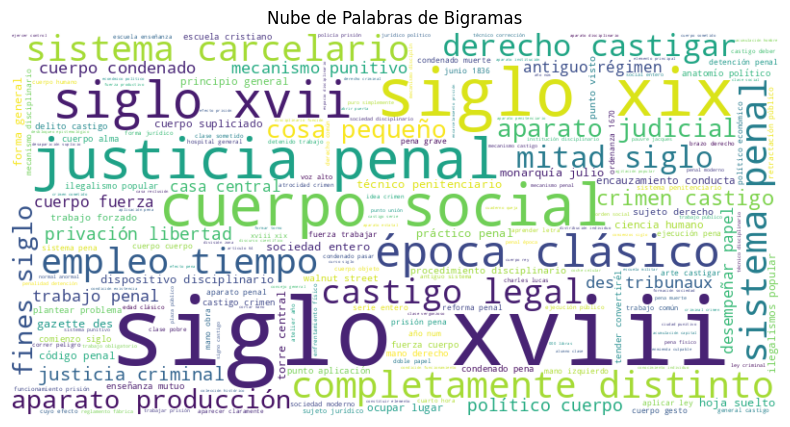

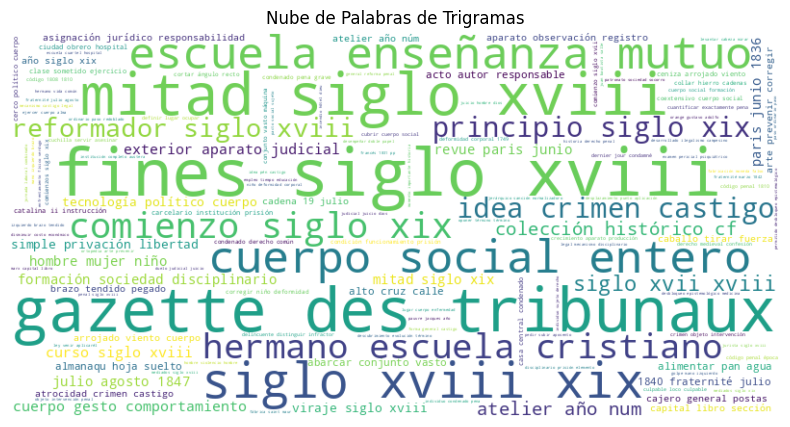

Top 10 Bigramas más frecuentes:
siglo xviii: 102
siglo xix: 41
cuerpo social: 30
justicia penal: 28
siglo xvii: 22
época clásico: 17
completamente distinto: 15
sistema penal: 15
empleo tiempo: 14
sistema carcelario: 14


Top 10 Trigramas más frecuentes:
fines siglo xviii: 10
gazette des tribunaux: 9
mitad siglo xviii: 8
siglo xviii xix: 6
cuerpo social entero: 5
escuela enseñanza mutuo: 5
comienzo siglo xix: 4
hermano escuela cristiano: 4
idea crimen castigo: 4
principio siglo xix: 4




In [6]:
# Generación de Bigramas y Trigramas
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# Convertir stop_words a lista
stop_words_lista = list(stop_words)

# Convertir los lemas filtrados a minúsculas y eliminar puntuación
lemas_filtrados_normalizados = [re.sub(r'\W+', '', lemma.lower()) for lemma in lemas_filtrados if lemma.lower() not in stop_words_lista]

# Crear n-gramas utilizando CountVectorizer
vectorizador_bi = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words_lista)
vectorizador_tri = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words_lista)

# Aplicar el vectorizador al texto lematizado y filtrado
texto_procesado = " ".join(lemas_filtrados_normalizados)
bi_gramas = vectorizador_bi.fit_transform([texto_procesado])
tri_gramas = vectorizador_tri.fit_transform([texto_procesado])

# Obtener las frecuencias de los n-gramas
bi_gramas_frecuencia = dict(zip(vectorizador_bi.get_feature_names_out(), bi_gramas.toarray()[0]))
tri_gramas_frecuencia = dict(zip(vectorizador_tri.get_feature_names_out(), tri_gramas.toarray()[0]))

# Verificar si 'él' ha sido eliminado en los n-gramas
for n_gramas_frecuencia, titulo in zip(
    [bi_gramas_frecuencia, tri_gramas_frecuencia],
    ["Bigramas", "Trigramas"]):
    if any('él' in n_grama.lower() for n_grama in n_gramas_frecuencia):
        print(f"La palabra 'él' no ha sido eliminada correctamente en {titulo}.")
    else:
        print(f"La palabra 'él' ha sido eliminada correctamente en {titulo}.")

# Visualización de n-gramas mediante nubes de palabras
for n_gramas_frecuencia, titulo in zip(
    [bi_gramas_frecuencia, tri_gramas_frecuencia],
    ["Bigramas", "Trigramas"]):
    if n_gramas_frecuencia:  # Verificar si hay datos para visualizar
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(n_gramas_frecuencia)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Nube de Palabras de {titulo}')
        plt.show()

# Mostrar los 10 n-gramas más frecuentes para cada tipo
for n_gramas_frecuencia, titulo in zip(
    [bi_gramas_frecuencia, tri_gramas_frecuencia],
    ["Bigramas", "Trigramas"]):
    print(f"Top 10 {titulo} más frecuentes:")
    top_n_gramas = sorted(n_gramas_frecuencia.items(), key=lambda x: x[1], reverse=True)[:10]
    for n_grama, frecuencia in top_n_gramas:
        print(f"{n_grama}: {frecuencia}")
    print("\n")


Los resultados del análisis de n-gramas proporcionan una visión clara sobre la prevalencia de términos y frases clave en el texto de "Vigilar y Castigar". En el caso de los bigramas, los términos más recurrentes son "siglo xviii", "siglo xix", "cuerpo social", y "justicia penal", lo cual refleja el enfoque del texto en el contexto histórico y en la evolución de los sistemas de control social y castigo durante estos períodos. La prominencia de expresiones como "cuerpo social" y "justicia penal" sugiere un interés central en el funcionamiento del poder sobre el colectivo y las instituciones penales, que es uno de los temas principales de Foucault.

En cuanto a los trigramas, observamos frases como "fines siglo xviii", "gazette des tribunaux", y "cuerpo social entero", lo cual confirma una preocupación detallada por los contextos específicos y las estructuras históricas que sustentan las prácticas disciplinarias. Es notable la presencia del término "gazette des tribunaux", que alude a la referencia a documentos legales y publicaciones de tribunales, subrayando la importancia del rol de los registros y la vigilancia pública en el control social.

Estos hallazgos refuerzan la relevancia de los aspectos históricos del fenómeno y de vigilancia pública como elementos esenciales en la narrativa de Foucault sobre el poder disciplinario. La frecuencia de estos n-gramas nos permite identificar y visualizar las principales áreas temáticas del texto, así como la manera en que se construyen y repiten los conceptos fundamentales en la obra.

##**Análisis de Relevancia Semántica mediante TF-IDF Combinando Lemas y N-gramas**##


En esta sección, aplicaremos la técnica de TF-IDF (Term Frequency-Inverse Document Frequency) para analizar el texto lematizado y los n-gramas generados de "Vigilar y Castigar" de Michel Foucault. La decisión de combinar lemas y n-gramas responde al interés por obtener una representación más rica y matizada del contenido. Mientras que los lemas nos permiten reducir el texto a sus formas base, eliminando variaciones gramaticales, los n-gramas nos permiten capturar la semántica de las frases más comunes y las conexiones entre palabras clave. Este enfoque combinado busca equilibrar la precisión de la lematización con la capacidad contextual de los n-gramas, proporcionando una mejor identificación de los términos y expresiones más relevantes del discurso.

Al aplicar TF-IDF sobre esta combinación de lemas y n-gramas, podremos identificar tanto palabras individuales como frases que aporten un valor significativo al análisis. La técnica de TF-IDF nos ayudará a destacar términos que, aunque frecuentes, son relevantes por su capacidad de distinguir el discurso de Foucault sobre el poder, la vigilancia y la disciplina. En lugar de centrarnos en ocurrencias simples, TF-IDF ponderará la importancia de cada término o frase, revelando aquellas que son fundamentales para comprender la estructura de control social descrita en la obra. Esta combinación de enfoques mejora la calidad del análisis, permitiéndonos no solo identificar las palabras clave, sino también explorar cómo estos términos interactúan y se contextualizan dentro del discurso más amplio del texto.


--- Resultados TF-IDF con Lemas y N-gramas Combinados ---
Características (palabras) más relevantes según TF-IDF con lemas y n-gramas:
        000      1791      1836      1840    abajo  abandonado  abandonar  \
0  0.008431  0.009143  0.011756  0.008668  0.01425     0.00855     0.0133   

    abierto     abrir  absoluto  ...      xvii     xviii    ánimo     época  \
0  0.011875  0.015912  0.022799  ...  0.013062  0.057711  0.00855  0.040611   

    índolar    índole     órden  únicamente     único      útil  
0  0.011043  0.008431  0.010687    0.018999  0.022443  0.042749  

[1 rows x 1000 columns]
000: 0.008430971768031913
1791: 0.00914344825547123
1836: 0.011755862042748724
1840: 0.008668463930511685
abajo: 0.014249529748786332
abandonado: 0.008549717849271799
abandonar: 0.013299561098867242
abierto: 0.01187460812398861
abrir: 0.015911974886144736
absoluto: 0.02279924759805813
acabar: 0.012705830692667812
acción: 0.02921153598501198
aceptado: 0.008430971768031913
acompañado: 0.00902

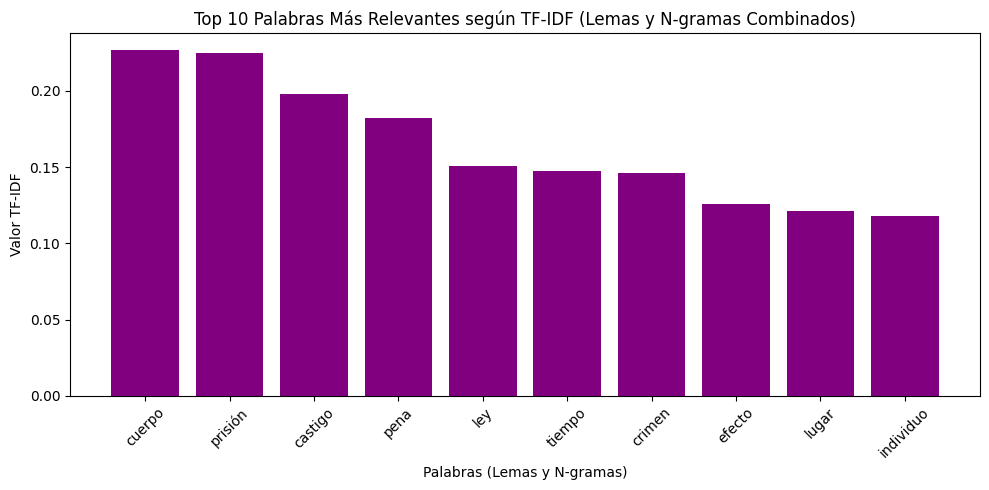

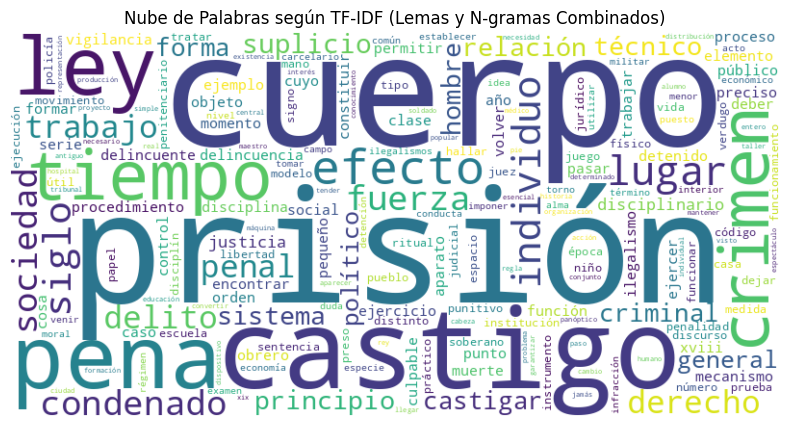

In [7]:
# Aplicación de TF-IDF Vectorización con lemas y n-gramas combinados
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Asegurarse de que las variables de entrada estén definidas
# Estas variables deben provenir de la ejecución de código previo
# lemas_filtrados: lista de lemas del texto tras la lematización y eliminación de stopwords
# bi_gramas_frecuencia y tri_gramas_frecuencia: diccionarios con las frecuencias de bigramas y trigramas

# Crear el texto procesado combinando lemas y n-gramas
texto_procesado_combinado = " ".join(lemas_filtrados) + " " + " ".join(bi_gramas_frecuencia.keys()) + " " + " ".join(tri_gramas_frecuencia.keys())

# Aplicación de TF-IDF Vectorización con lemas y n-gramas combinados
vectorizador_tfidf_combinado = TfidfVectorizer(max_features=1000, stop_words=stop_words_lista)
tf_idf_matriz_combinada = vectorizador_tfidf_combinado.fit_transform([texto_procesado_combinado])

# Convertir la matriz TF-IDF a un DataFrame para visualizar los resultados
print("\n--- Resultados TF-IDF con Lemas y N-gramas Combinados ---")
tf_idf_df_combinado = pd.DataFrame(tf_idf_matriz_combinada.toarray(), columns=vectorizador_tfidf_combinado.get_feature_names_out())
print("Características (palabras) más relevantes según TF-IDF con lemas y n-gramas:")
print(tf_idf_df_combinado)

# Mostrar las palabras y sus puntajes para lemas y n-gramas combinados
for palabra, puntaje in zip(vectorizador_tfidf_combinado.get_feature_names_out(), tf_idf_matriz_combinada.toarray()[0]):
    print(f"{palabra}: {puntaje}")

# Evaluación del proceso TF-IDF con lemas y n-gramas combinados
print("\nMétricas del proceso TF-IDF con lemas y n-gramas combinados:")
print(f"Cantidad de características extraídas: {len(vectorizador_tfidf_combinado.get_feature_names_out())}")
print(f"Suma de todos los puntajes TF-IDF: {tf_idf_matriz_combinada.sum()} ")
print(f"Promedio de puntajes TF-IDF: {tf_idf_matriz_combinada.mean()} ")

# Visualización de los resultados de TF-IDF con Lemas y N-gramas Combinados
# 1. Gráfico de Barras para los 10 principales términos
plt.figure(figsize=(10, 5))
top_10_combinado = tf_idf_df_combinado.iloc[0].nlargest(10)
plt.bar(top_10_combinado.index, top_10_combinado.values, color='purple')
plt.xlabel('Palabras (Lemas y N-gramas)')
plt.ylabel('Valor TF-IDF')
plt.title('Top 10 Palabras Más Relevantes según TF-IDF (Lemas y N-gramas Combinados)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Nube de Palabras para TF-IDF con Lemas y N-gramas Combinados
wordcloud_combinado = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tf_idf_df_combinado.iloc[0].to_dict())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_combinado, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras según TF-IDF (Lemas y N-gramas Combinados)')
plt.show()


Los resultados del análisis utilizando TF-IDF, con lemas y n-gramas combinados, proporcionan una perspectiva cuantitativa sobre las palabras y expresiones más relevantes dentro del texto. La gráfica de barras muestra las diez palabras con los valores TF-IDF más altos, mientras que la nube de palabras destaca una variedad de términos clave.

En la gráfica de barras, términos como "cuerpo", "prisión", "castigo", "pena" y "ley" sobresalen como los conceptos más destacados, lo que refuerza la centralidad de estos elementos en la obra del autor. Estos términos evidencian la relevancia de los cuerpos y las instituciones penales en la construcción de mecanismos de poder y disciplina, que son temas recurrentes en el libro. El enfoque en palabras como "crimen", "efecto" e "individuo" sugiere una preocupación sobre cómo el castigo afecta no solo al cuerpo, sino también a la identidad y al comportamiento de los individuos penalizados en la sociedad.

La nube de palabras ofrece una visión más amplia de los términos que aparecen con alta frecuencia y relevancia en el texto, permitiendo identificar conceptos relacionados con el control social, la vigilancia y el sistema penal. La prominencia de "prisión", "castigo" y "cuerpo" junto a otras palabras como "sistema", "efecto" y "vigilancia" revela cómo la narrativa de Foucault conecta los elementos del control físico con el aparato institucional y las políticas de disciplina.

La decisión de combinar lemas y n-gramas en el análisis permite capturar tanto los términos individuales significativos como las relaciones semánticas que se forman al considerar expresiones de múltiples palabras. De este modo, logramos una mejor representación de los conceptos centrales y de las frases que encapsulan ideas fundamentales del texto.

Las métricas indican la relevancia de los conceptos, con un total de 1,000 características extraídas y un valor promedio de TF-IDF de 0.0218, lo que muestra la prominencia de estos términos clave en el contexto general del texto.

##**Análisis de Tópicos mediante LDA con Lemas y N-gramas Combinados**##


En esta sección, aplicaremos la técnica de Asignación Latente de Dirichlet (LDA) para realizar un análisis de tópicos en el texto de "Vigilar y Castigar" de Michel Foucault, utilizando nuevamente una combinación de lemas y n-gramas. La técnica LDA nos permite identificar automáticamente temas subyacentes en un conjunto de documentos, y en este caso, al combinar lemas individuales con bigramas y trigramas, buscamos capturar tanto los conceptos fundamentales como las expresiones más complejas que emergen del análisis del texto.

El uso de LDA con lemas y n-gramas nos brinda la capacidad de detectar patrones recurrentes y relaciones temáticas dentro del discurso foucaultiano sobre vigilancia, control y castigo. Al analizar la distribución de palabras en cada uno de los tópicos extraídos, podremos entender mejor cómo se organizan los conceptos clave y cómo se relacionan para formar los ejes centrales del pensamiento del autor. La visualización de los tópicos mediante nubes de palabras ayudará a resaltar los términos predominantes que definen cada tema, proporcionando una perspectiva visual de los elementos más relevantes en el análisis de Foucault en su texto.


--- Resultados LDA con Lemas y N-gramas Combinados ---
Tópico 1:
['ley', 'sistema', 'delito', 'efecto', 'tiempo', 'crimen', 'condenado', 'pena', 'castigo', 'prisión']
Tópico 2:
['individuo', 'lugar', 'efecto', 'crimen', 'tiempo', 'ley', 'pena', 'castigo', 'prisión', 'cuerpo']
Tópico 3:
['sociedad', 'delito', 'ley', 'sistema', 'condenado', 'crimen', 'prisión', 'cuerpo', 'castigo', 'pena']


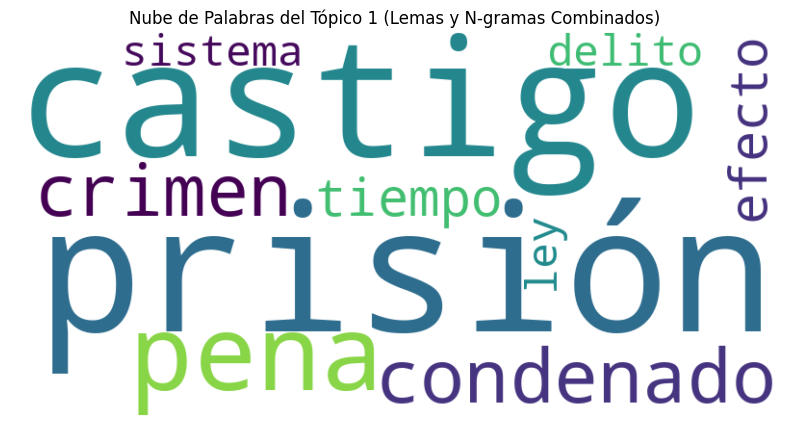

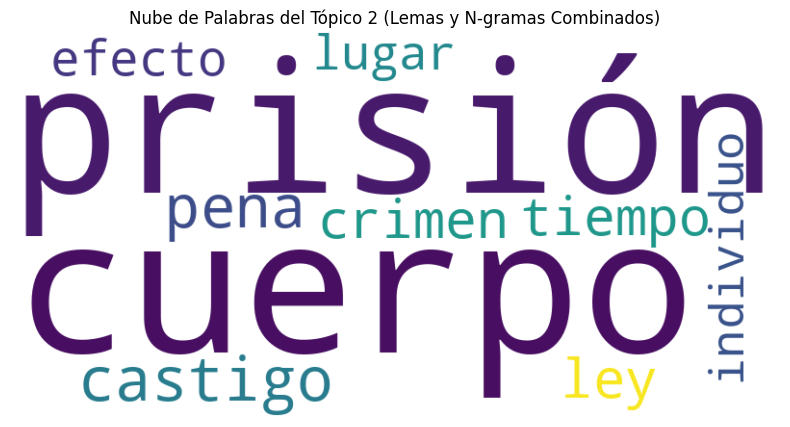

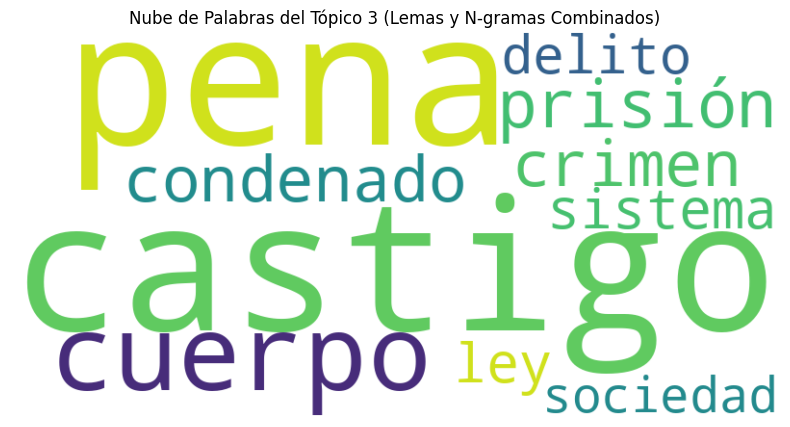

In [ ]:
# Análisis LDA con lemas y n-gramas combinados
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Asegurarse de que las variables de entrada estén definidas
# Estas variables deben provenir de la ejecución de código previo
# lemas_filtrados: lista de lemas del texto tras la lematización y eliminación de stopwords
# bi_gramas_frecuencia y tri_gramas_frecuencia: diccionarios con las frecuencias de bigramas y trigramas

# Crear el texto procesado combinando lemas y n-gramas
texto_procesado_combinado = " ".join(lemas_filtrados) + " " + " ".join(bi_gramas_frecuencia.keys()) + " " + " ".join(tri_gramas_frecuencia.keys())

# Aplicación de LDA con lemas y n-gramas combinados
vectorizador_combinado = CountVectorizer(max_features=1000, stop_words=stop_words_lista)
matriz_combinada = vectorizador_combinado.fit_transform([texto_procesado_combinado])
lda_combinado = LatentDirichletAllocation(n_components=3, random_state=42)
lda_combinado.fit(matriz_combinada)

# Imprimir resultados del LDA con lemas y n-gramas combinados
print("\n--- Resultados LDA con Lemas y N-gramas Combinados ---")
for idx, topic in enumerate(lda_combinado.components_):
    print(f"Tópico {idx + 1}:")
    print([vectorizador_combinado.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

# Visualización de Tópicos utilizando nubes de palabras
for idx, topic in enumerate(lda_combinado.components_):
    topic_words = {vectorizador_combinado.get_feature_names_out()[i]: topic[i] for i in topic.argsort()[-10:]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras del Tópico {idx + 1} (Lemas y N-gramas Combinados)')
    plt.show()


##**Análisis de Resultados del Modelo LDA Aplicado a "Vigilar y Castigar" de Michel Foucault**##

Los resultados del análisis LDA (Latent Dirichlet Allocation) sobre el texto pre-procesado, lematizado y sus n-gramas, nos permiten identificar los temas predominantes dentro del corpus mediante la combinación de lemas y n-gramas. Al combinar estos dos enfoques, hemos logrado una representación más rica y contextual de los conceptos principales del texto.

En este análisis, el LDA identificó tres tópicos distintos, cada uno de los cuales contiene términos recurrentes que reflejan los temas centrales del libro:

1. **Tópico 1**: Este tópico está compuesto por términos como "prisión", "castigo", "pena", "condenado", "crimen", "tiempo", y "sistema". Esto indica un enfoque en la estructura del sistema penal, el proceso del castigo y la dinámica temporal involucrada en el cumplimiento de la pena. Es notable cómo términos como "condenado" y "delito" reflejan el interés del texto en las prácticas de condena y el sistema judicial.

2. **Tópico 2**: Este tópico resalta términos como "cuerpo", "prisión", "individuo", "lugar", y "efecto". Se observa un énfasis en el papel del cuerpo en el contexto del poder disciplinario, así como en la individualización del castigo y el espacio (la prisión) como un lugar central. La presencia de palabras como "efecto" y "tiempo" sugiere un interés en las consecuencias y el impacto del castigo sobre el individuo.

3. **Tópico 3**: Este tópico presenta términos como "pena", "cuerpo", "castigo", "sociedad", y "ley". Aquí se destaca el vínculo entre el castigo y la sociedad, resaltando la forma en que los sistemas disciplinarios se interrelacionan con el cuerpo y las normas legales. La inclusión de "sociedad" señala la conexión entre el poder penal y el cuerpo social más amplio, alineándose con la visión de Foucault sobre cómo la disciplina moldea el tejido social.

Los resultados obtenidos a partir del análisis LDA nos muestran cómo los conceptos de "cuerpo", "prisión", "castigo", y "pena" están profundamente interrelacionados en el discurso de Foucault. La combinación de lemas y n-gramas nos ha permitido captar no solo palabras individuales, sino también frases compuestas que mejor reflejan la complejidad del texto, proporcionando así una comprensión más clara y precisa de los temas que Foucault aborda en "Vigilar y Castigar".

Las visualizaciones de nubes de palabras refuerzan estas observaciones al mostrar los términos más importantes de cada tópico, permitiendo una interpretación visual del enfoque de cada uno en torno al sistema disciplinario, la interacción entre el cuerpo y la ley, y el papel de la sociedad en la regulación del comportamiento humano.

##**CONCLUSIONES GENERALES**##

Basándonos en los resultados de los análisis realizados a lo largo del proyecto, hemos obtenido importantes hallazgos sobre la estructura y los conceptos centrales en la obra "Vigilar y Castigar" de Michel Foucault. A través de técnicas de Procesamiento de Lenguaje Natural, como tokenización, lematización, generación de n-gramas, análisis TF-IDF y modelado de temas mediante LDA, hemos logrado identificar patrones recurrentes y los temas más prominentes dentro del texto.

**Tokenización y Lematización**: Inicialmente, el análisis involucró la tokenización y lematización del texto, lo cual nos permitió reducir la complejidad de las palabras al agruparlas por sus formas base. Esto facilitó la identificación de conceptos clave como "castigo", "cuerpo", y "prisión". La reducción de las stopwords fue exitosa y permitió que se enfocara el análisis en términos relevantes para los temas centrales de la obra.

**N-gramas**: Los bigramas y trigramas generados revelaron expresiones recurrentes como "siglo xviii", "justicia penal" y "cuerpo social", lo que refuerza la importancia del contexto histórico y el análisis del cuerpo y el sistema penal en la obra de Foucault. La presencia de estas expresiones sugiere un enfoque sistemático en la evolución de los mecanismos disciplinarios a través de diferentes épocas.

**TF-IDF**: Al aplicar TF-IDF, los términos más destacados incluyeron "cuerpo", "prisión", "castigo", y "pena". Estos resultados muestran la relevancia de conceptos que representan la centralidad del poder disciplinario y el castigo corporal, aspectos fundamentales de la teoría foucaultiana sobre el control social. La combinación de lemas y n-gramas en el análisis TF-IDF permitió obtener una visión más rica del texto, destacando cómo estos términos se relacionan entre sí y su relevancia en el discurso.

**Análisis LDA**: Finalmente, el análisis LDA con lemas y n-gramas combinados identificó tres tópicos principales, todos centrados en conceptos como "castigo", "prisión", "cuerpo", y "ley". Estos tópicos reflejan de manera clara los temas que Foucault explora en su obra: la estructura de la prisión, la disciplina del cuerpo y el funcionamiento del sistema penal. Cada uno de los tópicos revela una dimensión distinta del control disciplinario y cómo estos conceptos se entrelazan para formar una narrativa coherente sobre el poder y la vigilancia.

**CONSIDERACIONES FINALES**: A lo largo de este trabajo, hemos confirmado que "Vigilar y Castigar" está estructurado en torno a conceptos clave relacionados con el poder, el control del cuerpo, la prisión y el castigo. El análisis de n-gramas y TF-IDF destacó la prevalencia de términos asociados a instituciones disciplinarias y su papel en la sociedad. Por su parte, el análisis LDA permitió desglosar estos temas en tópicos coherentes, reafirmando la importancia de elementos como el "sistema", la "ley", y la "pena" en la estructura de poder descrita por Foucault.

Este enfoque aplicando herramientos de NLP ha permitido ofrecer una comprensión cuantitativa y cualitativa de los mecanismos de poder disciplinario descritos por Foucault. Así, hemos logrado no solo identificar los principales temas de la obra, sino también entender cómo estos se articulan y repiten a lo largo del texto, contribuyendo a un análisis sociológico más profundo desde una perspectiva computacional.